In [134]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Loading Dataset

In [135]:
df = pd.read_csv('/content/customer_churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0.0,Yes,No,1.0,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0.0,No,No,34.0,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0.0,No,No,2.0,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0.0,No,No,45.0,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0.0,No,No,2.0,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7036 non-null   float64
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7030 non-null   float64
 6   PhoneService      7030 non-null   object 
 7   MultipleLines     7030 non-null   object 
 8   InternetService   7006 non-null   object 
 9   OnlineSecurity    7028 non-null   object 
 10  OnlineBackup      7028 non-null   object 
 11  DeviceProtection  7028 non-null   object 
 12  TechSupport       7028 non-null   object 
 13  StreamingTV       7021 non-null   object 
 14  StreamingMovies   7029 non-null   object 
 15  Contract          7018 non-null   object 
 16  PaperlessBilling  7029 non-null   object 


In [137]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7036.000000,7030.000000,7027.000000
mean,0.162024,32.367568,64.757855
std,0.368499,24.560644,30.091845
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [138]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,7
Partner,0
Dependents,0
tenure,13
PhoneService,13
MultipleLines,13
InternetService,37
OnlineSecurity,15


In [139]:
df.shape

(7043, 21)

In [140]:
#remove the 'customerID' column as it is not needed for clustering
df.drop(columns=['customerID'], inplace=True)

In [141]:
# handle missing values
df.fillna(df.select_dtypes(include='number').mean(), inplace=True)
# handle categorical missing values by filling them with the mode of the respective columns
df.fillna(df.select_dtypes(include='object').mode().iloc[0], inplace=True)

In [142]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


In [143]:
# check for duplicates
df.duplicated().sum()

np.int64(21)

In [144]:
# handle duplicates by removing them
df.drop_duplicates(inplace=True)

# check for duplicates again
df.duplicated().sum()

np.int64(0)

# Univariate analysis

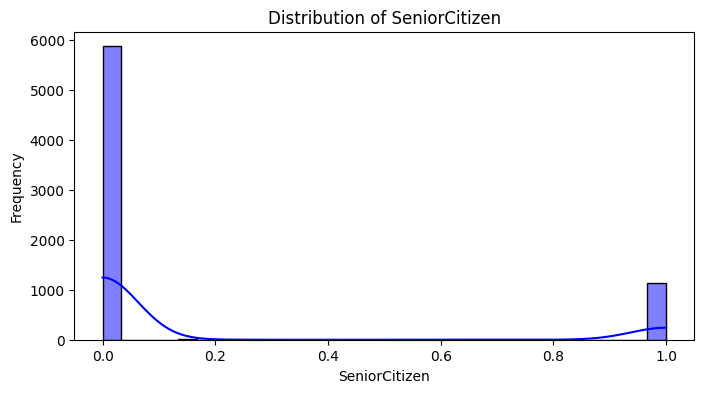

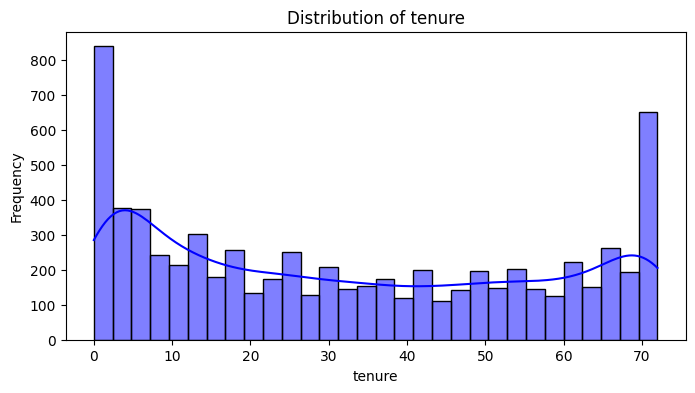

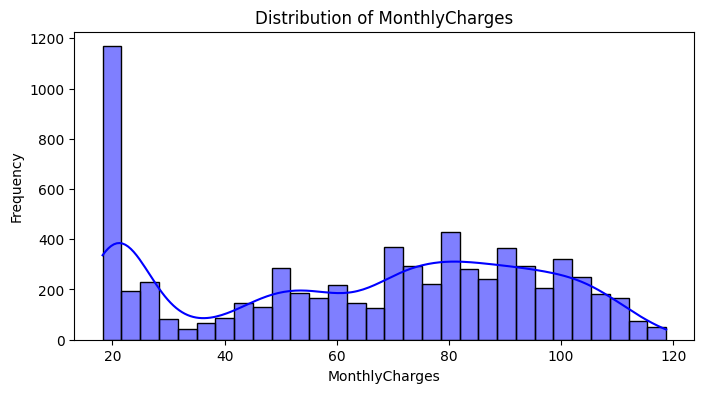

In [145]:
# check the distribution of numerical features
numerical_features = df.select_dtypes(include=['int64', 'float64']).columns

# plot histograms for numerical features
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], bins=30, kde=True, color='blue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.show()

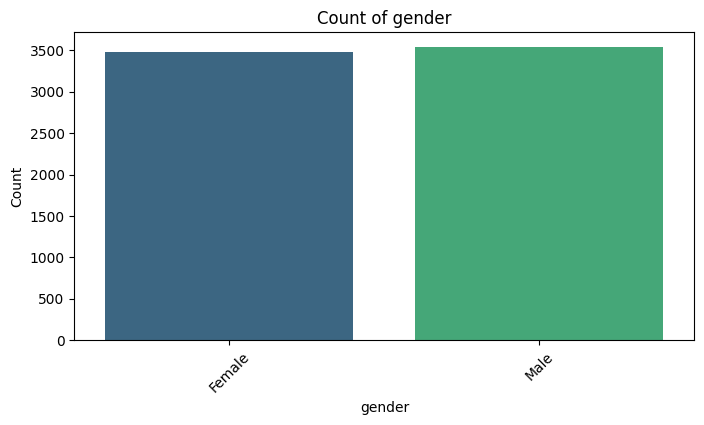

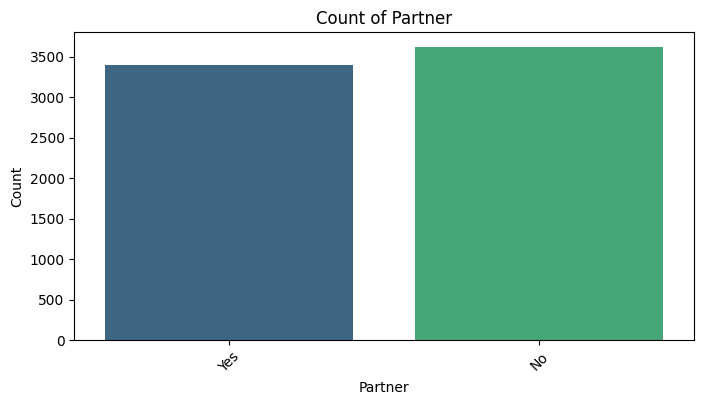

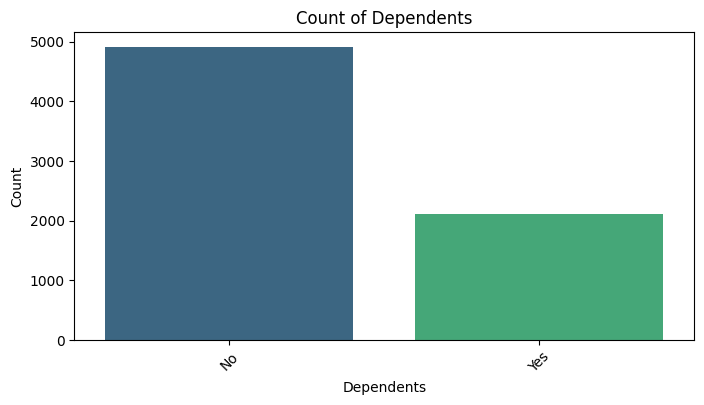

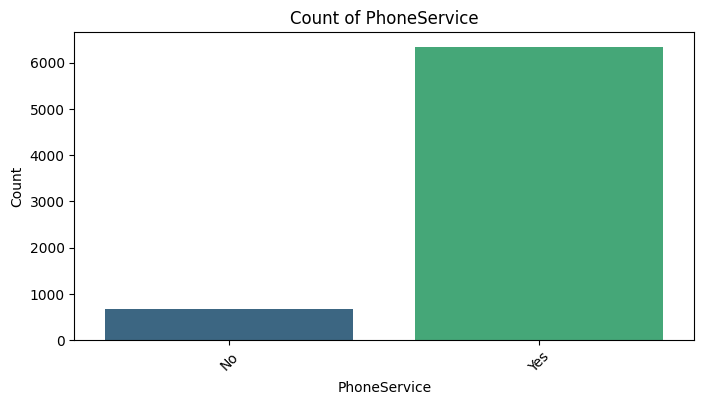

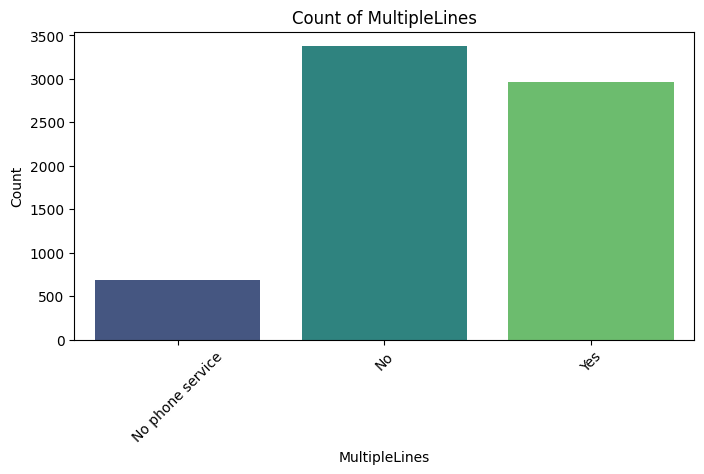

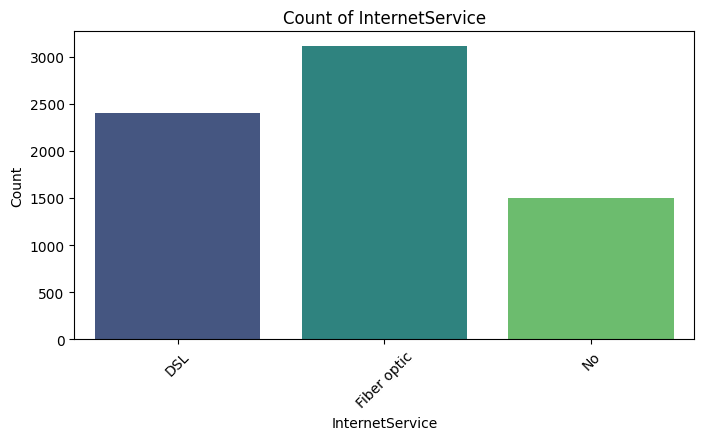

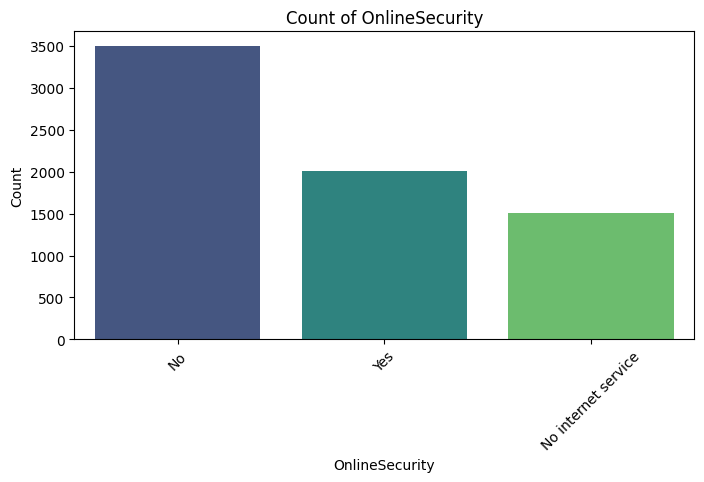

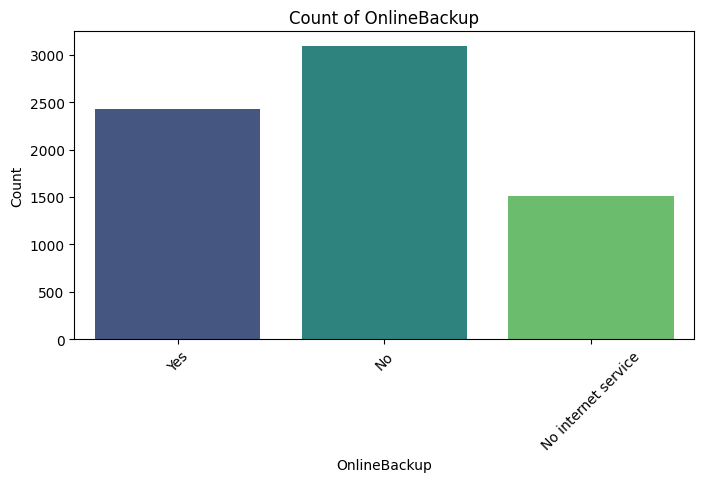

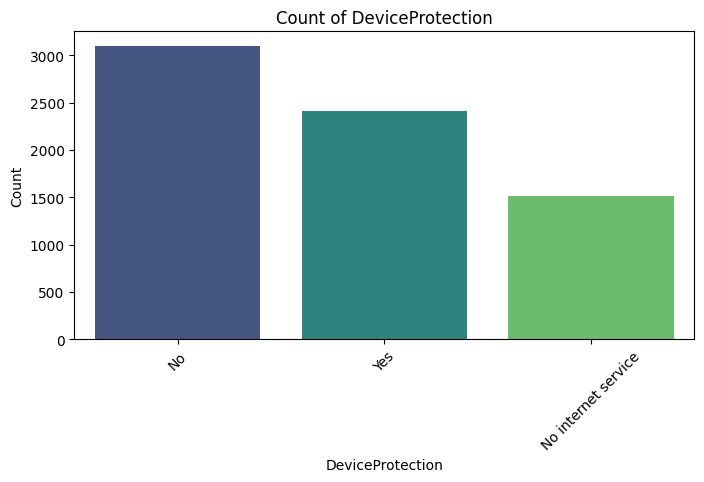

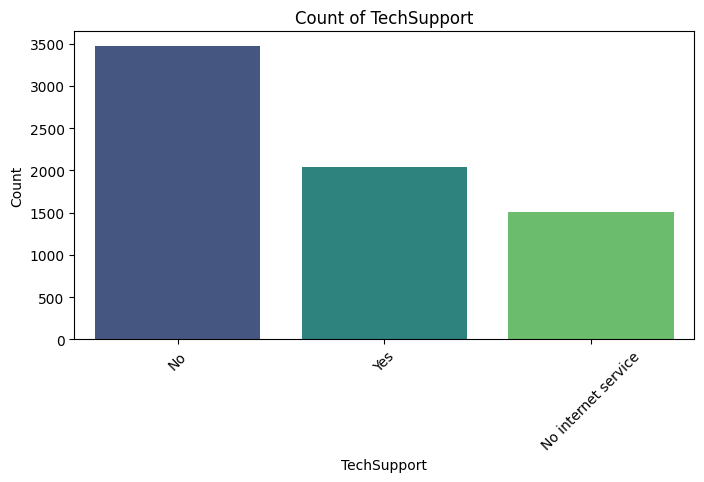

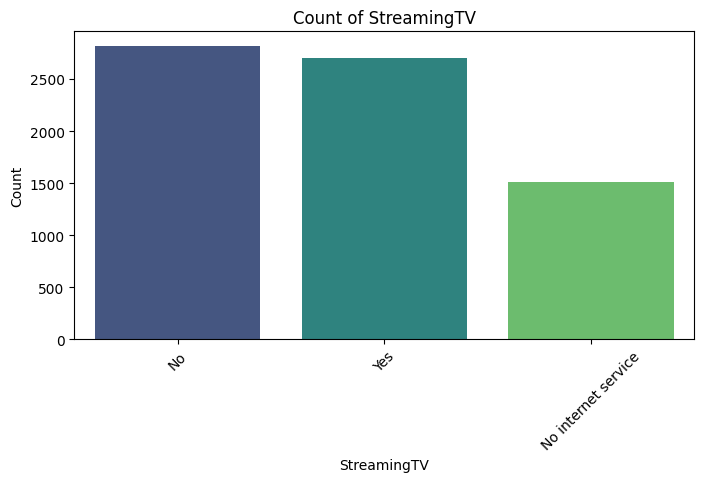

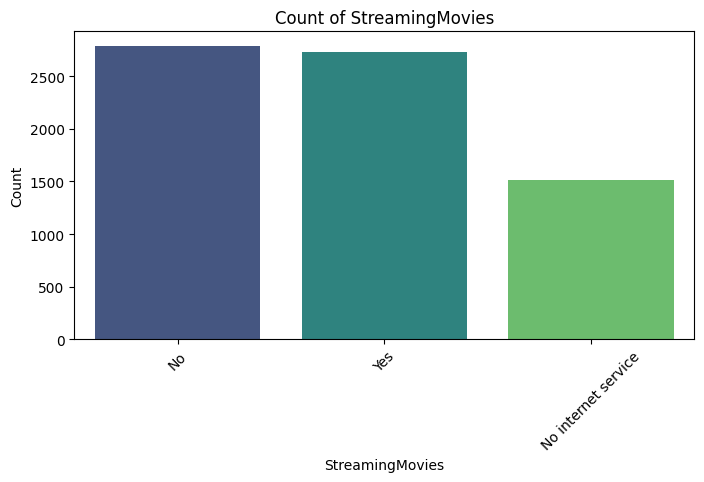

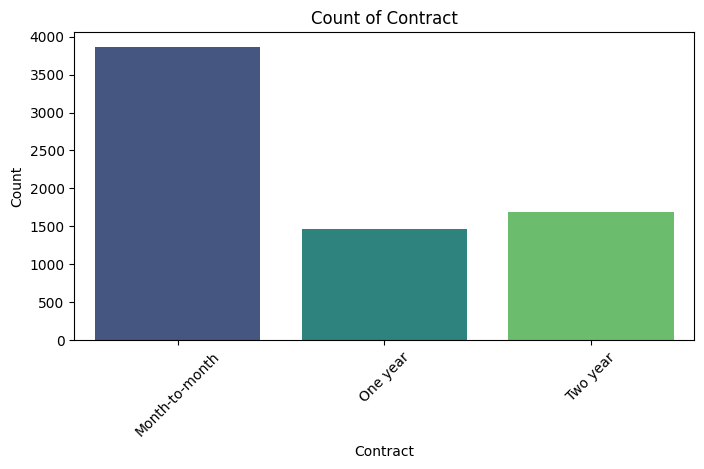

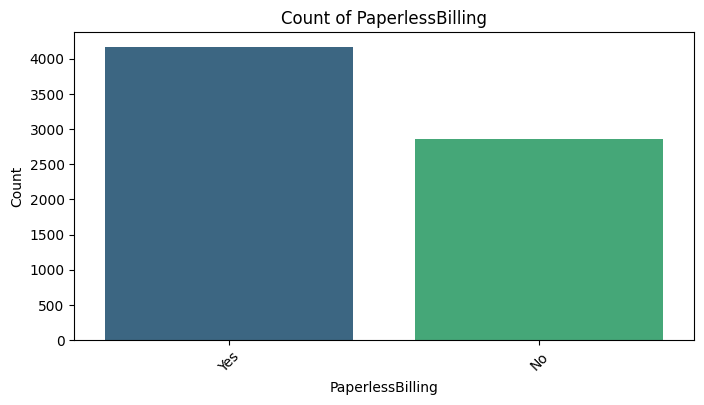

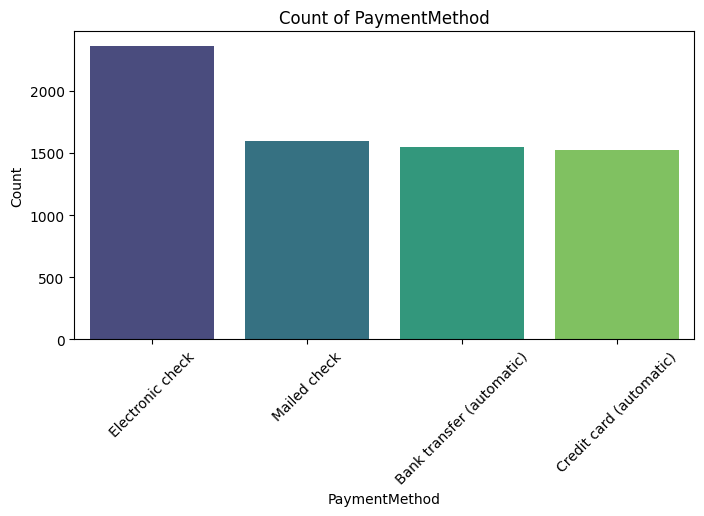

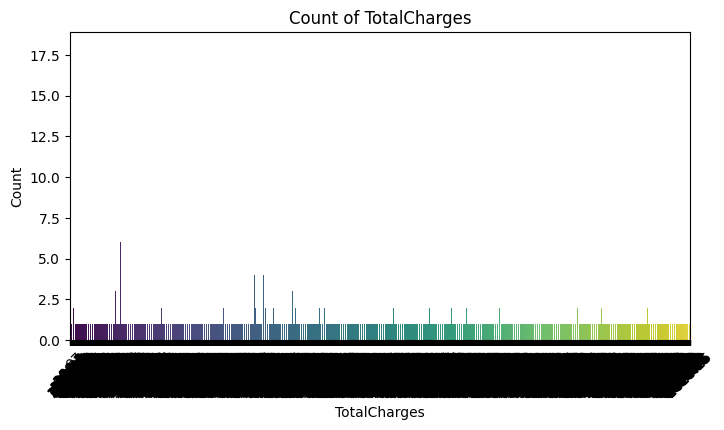

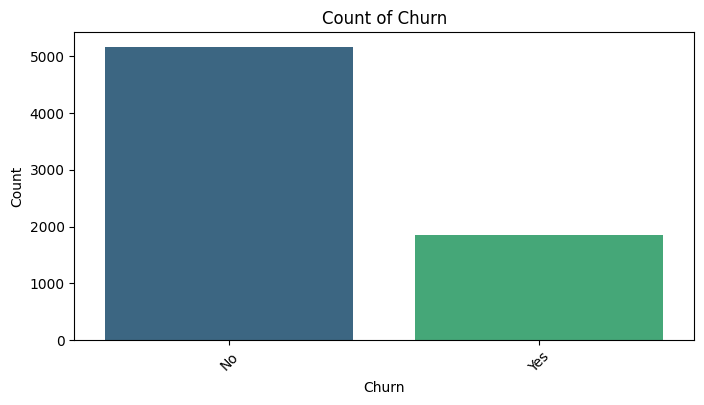

In [146]:
# univariate analysis for categorical features
categorical_features = df.select_dtypes(include=['object']).columns

# plot count plots for categorical features
for feature in categorical_features:
    plt.figure(figsize=(8, 4))
    sns.countplot(data=df, x=feature, palette='viridis')
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

# Bivariate analysis

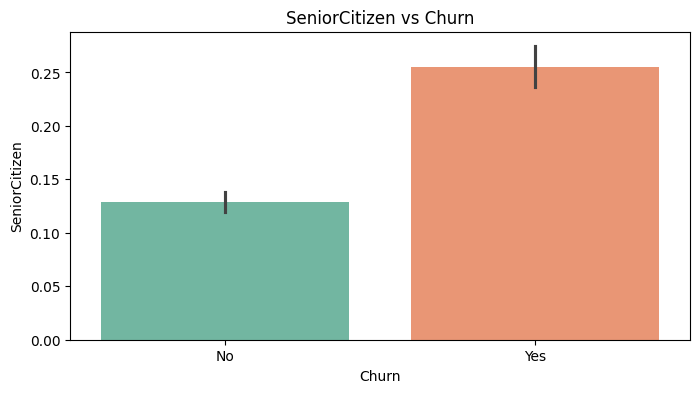

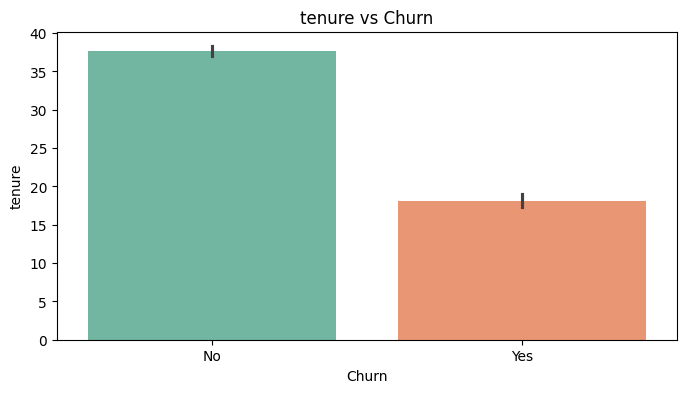

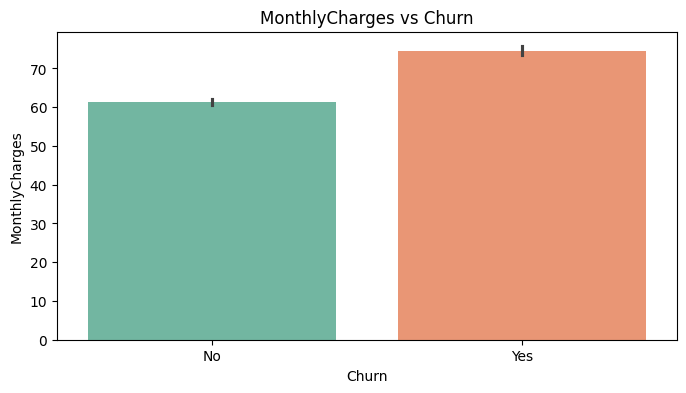

In [147]:
# check the relationship between numerical features and the target variable
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.barplot(data=df, x='Churn', y=feature, palette='Set2')
    plt.title(f'{feature} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(feature)
    plt.show()


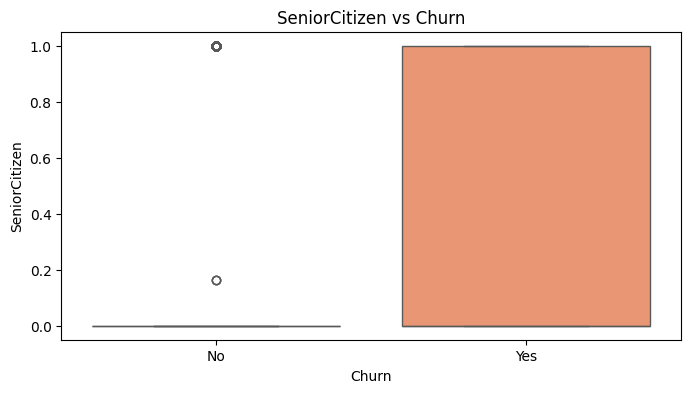

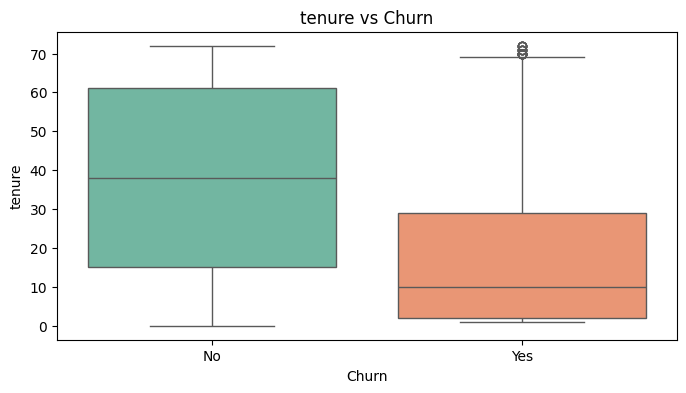

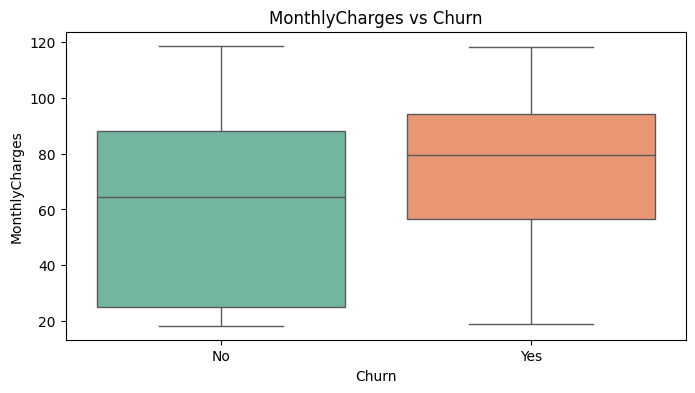

In [148]:
# check the relationship between numerical features and the target variable
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data=df, x='Churn', y=feature, palette='Set2')
    plt.title(f'{feature} vs Churn')
    plt.xlabel('Churn')
    plt.ylabel(feature)
    plt.show()

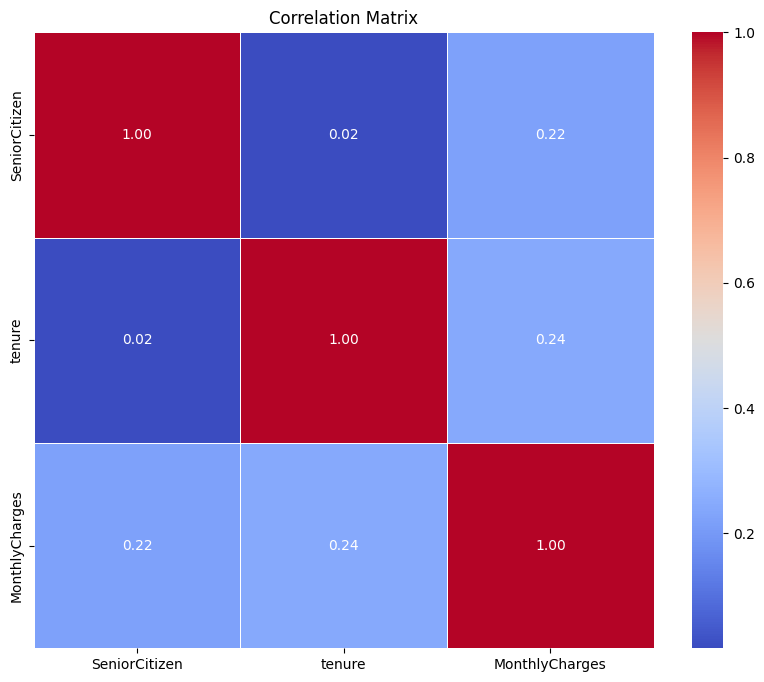

In [149]:
# Multivariate analysis
# check the correlation between numerical features
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

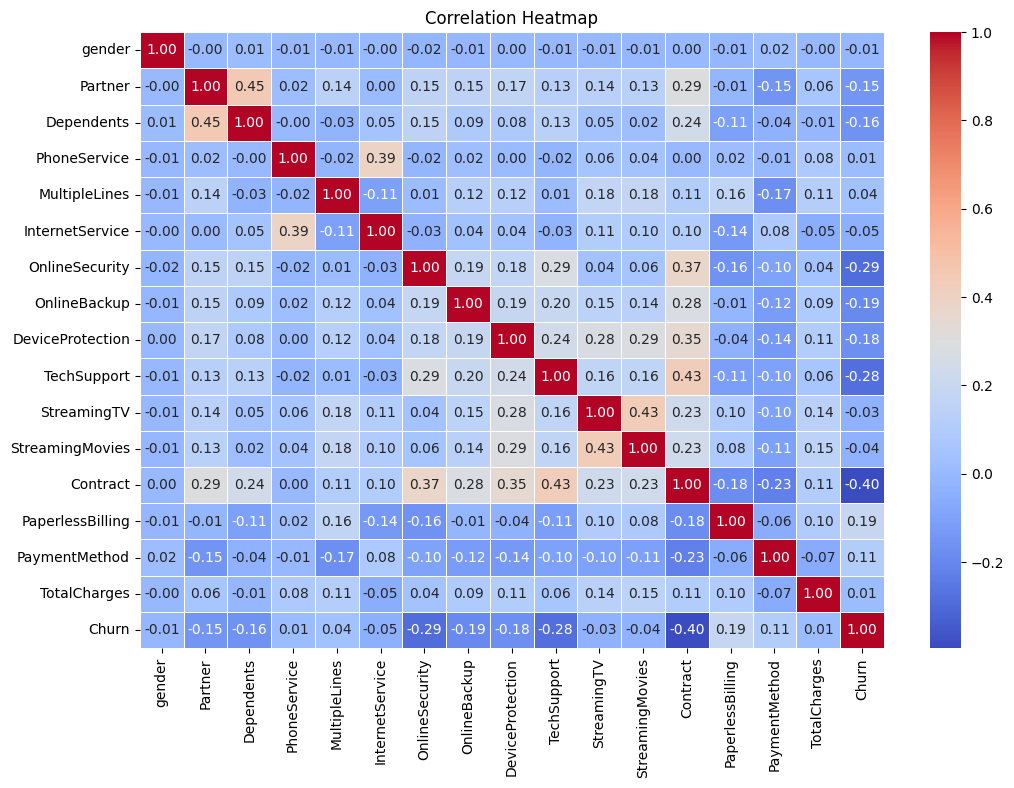

In [150]:
# Plot correlation heatmap for categorical columns only
categorical_df = df.select_dtypes(include=['object'])  # Select only categorical columns

# Encode categorical columns into numeric values
encoded_df = categorical_df.apply(lambda col: col.astype('category').cat.codes)

# Compute the correlation matrix
correlation_matrix = encoded_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

In [151]:

# Make a copy for clean operations
df_clean = df.copy()

# Convert 'TotalCharges' to numeric, coerce errors (turn invalid entries to NaN)
df_clean['TotalCharges'] = pd.to_numeric(df_clean['TotalCharges'], errors='coerce')

# Check again for missing values (after coercion)
nulls_post_conversion = df_clean.isnull().sum()

# Drop rows with any remaining nulls (very small percentage of data)
df_clean.dropna(inplace=True)

# Normalize categorical values: unify "No internet service"/"No phone service" to just "No"
no_service_cols = [
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'MultipleLines'
]
for col in no_service_cols:
    df_clean[col] = df_clean[col].replace({'No internet service': 'No', 'No phone service': 'No'})

# Encode binary categorical columns
binary_cols = [
    'Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'Churn', 'gender'
]
for col in binary_cols:
    df_clean[col] = df_clean[col].map({'Yes': 1, 'No': 0, 'Male': 1, 'Female': 0})

# One-hot encode remaining categorical variables
df_encoded = pd.get_dummies(df_clean, drop_first=True)

# Show shape after cleaning + head
df_encoded.shape, df_encoded.head()


((7004, 24),
    gender  SeniorCitizen  Partner  Dependents  tenure  PhoneService  \
 0       0            0.0        1           0     1.0             0   
 1       1            0.0        0           0    34.0             1   
 2       1            0.0        0           0     2.0             1   
 3       1            0.0        0           0    45.0             0   
 4       0            0.0        0           0     2.0             1   
 
    PaperlessBilling  MonthlyCharges  TotalCharges  Churn  ...  \
 0                 1           29.85         29.85      0  ...   
 1                 0           56.95       1889.50      0  ...   
 2                 1           53.85        108.15      1  ...   
 3                 0           42.30       1840.75      0  ...   
 4                 1           70.70        151.65      1  ...   
 
    OnlineBackup_Yes  DeviceProtection_Yes  TechSupport_Yes  StreamingTV_Yes  \
 0              True                 False            False            Fals

In [152]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Split features and target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# Train-test split (with stratification to maintain class distribution)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standard scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply SMOTE to the training data (only, to avoid data leakage)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

print(f"Before SMOTE: {y_train.value_counts()}")
print(f"After SMOTE: {y_train_smote.value_counts()}")


Before SMOTE: Churn
0    4117
1    1486
Name: count, dtype: int64
After SMOTE: Churn
0    4117
1    4117
Name: count, dtype: int64


In [153]:
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]


In [154]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Define models (using balanced weights only for comparison; XGBoost scale_pos_weight now 1 since SMOTE balanced)
models = {
    'Logistic Regression (SMOTE)': LogisticRegression(max_iter=1000),
    'Random Forest (SMOTE)': RandomForestClassifier(n_estimators=100, random_state=42),
    'XGBoost (SMOTE)': XGBClassifier(
        use_label_encoder=False,
        eval_metric='logloss',
        random_state=42
    )
}

# Fit each model on SMOTE data and evaluate on the original test split
for name, model in models.items():
    model.fit(X_train_smote, y_train_smote)
    y_pred = model.predict(X_test_scaled)
    y_proba = model.predict_proba(X_test_scaled)[:, 1]

    print(f"\n=== {name} ===")
    print(f"ROC-AUC: {roc_auc_score(y_test, y_proba):.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, target_names=['No-Churn','Churn']))
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))



=== Logistic Regression (SMOTE) ===
ROC-AUC: 0.8402
Classification Report:
              precision    recall  f1-score   support

    No-Churn       0.89      0.72      0.80      1030
       Churn       0.50      0.76      0.60       371

    accuracy                           0.73      1401
   macro avg       0.70      0.74      0.70      1401
weighted avg       0.79      0.73      0.75      1401

Confusion Matrix:
[[746 284]
 [ 89 282]]

=== Random Forest (SMOTE) ===
ROC-AUC: 0.8110
Classification Report:
              precision    recall  f1-score   support

    No-Churn       0.85      0.84      0.85      1030
       Churn       0.57      0.58      0.58       371

    accuracy                           0.77      1401
   macro avg       0.71      0.71      0.71      1401
weighted avg       0.78      0.77      0.77      1401

Confusion Matrix:
[[870 160]
 [156 215]]

=== XGBoost (SMOTE) ===
ROC-AUC: 0.8173
Classification Report:
              precision    recall  f1-score   support


In [155]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Calculate class imbalance ratio for scale_pos_weight
neg, pos = y_train.value_counts()
scale_ratio = neg / pos

# Base model
xgb_base = XGBClassifier(
    objective='binary:logistic',
    use_label_encoder=False,
    eval_metric='logloss',
    scale_pos_weight=scale_ratio,
    random_state=42
)

# Define grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0],
}

# Grid search with 5-fold CV
grid_search = GridSearchCV(
    estimator=xgb_base,
    param_grid=param_grid,
    scoring='roc_auc',
    cv=5,
    verbose=2,
    n_jobs=-1
)

# Fit grid search
grid_search.fit(X_train, y_train)

# Best model and parameters
print(" Best ROC-AUC Score: ", grid_search.best_score_)
print(" Best Parameters: ", grid_search.best_params_)

# Predict with the best model
best_xgb = grid_search.best_estimator_
y_pred = best_xgb.predict(X_test)
y_proba = best_xgb.predict_proba(X_test)[:, 1]


Fitting 5 folds for each of 72 candidates, totalling 360 fits
 Best ROC-AUC Score:  0.8466606929604318
 Best Parameters:  {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}


In [156]:
# save the model
import joblib
joblib.dump(best_xgb, 'xgbmodel.pkl')



['xgbmodel.pkl']